# Case Study - World Happiness Analysis Project

## Table of Content

1. Importing Libraries
2. Importing Data
3. Elbow Technique
4. K-mean Clustering
5. Grouping


# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Import the kmeans algorithm from scikit-learn
import pylab as pl #Pylab is a convenience module that bulk imports matplotlib

In [2]:
# This option ensures the charts created  are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# 02a. Importing Data - 2017 Data

In [3]:
# Path & list setup
path = r'/Users/ChuahLH/Desktop/Data Science/Data Immersion/Achievement 6/World Happiness Analysis'

In [4]:
# Import 2015.csv dataset into notebook using the os library and the vars_list
df_2017 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '2017_clean_data.csv'), index_col = False)

In [5]:
df_2017.head()

,Unnamed: 0,Country,happiness_rank_2017,happiness_score_2017,whisker_high_2017,whisker_low_2017,economy_gdp_2017,family_2017,health_life_expectancy_2017,freedom_2017,generosity_2017,trust_2017,dystopia_residual_2017
0,0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
# Drop the redundant columns
df_2017 = df_2017.drop(['Unnamed: 0'],axis = 1)

In [7]:
df_2017.shape

(155, 12)

In [8]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      155 non-null    object 
 1   happiness_rank_2017          155 non-null    int64  
 2   happiness_score_2017         155 non-null    float64
 3   whisker_high_2017            155 non-null    float64
 4   whisker_low_2017             155 non-null    float64
 5   economy_gdp_2017             155 non-null    float64
 6   family_2017                  155 non-null    float64
 7   health_life_expectancy_2017  155 non-null    float64
 8   freedom_2017                 155 non-null    float64
 9   generosity_2017              155 non-null    float64
 10  trust_2017                   155 non-null    float64
 11  dystopia_residual_2017       155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB


### Note: Data Wrangling, Subsetting and Consistency Check had been previously carried out in Exercise 6.1

In [12]:
# There are mixed of categorical data and numerical data. Just keep the numerical data in this exercise.
df_2017_clean = df_2017.drop(columns =['Country','whisker_high_2017','whisker_low_2017','happiness_rank_2017'])

In [13]:
df_2017_clean

,happiness_score_2017,economy_gdp_2017,family_2017,health_life_expectancy_2017,freedom_2017,generosity_2017,trust_2017,dystopia_residual_2017
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...
150,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


# 03a. Elbow Technique - 2016 Data

In [14]:
# Stating by defining the range of the cluster
num_cl = range(1, 10) 
# Then, defining the k-means cluster in the above range.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [15]:
# Now, create a score for each of the ranges created..
score_2017 = [kmeans[i].fit(df_2017_clean).score(df_2017_clean) for i in range(len(kmeans))] 

In [16]:
score_2017

[-292.0609454068548,
 -127.52670067570597,
 -86.48468316099297,
 -73.15065070116411,
 -63.23669392085407,
 -54.71556222981592,
 -48.96090148646279,
 -43.3675673384361,
 -40.38827116028995]

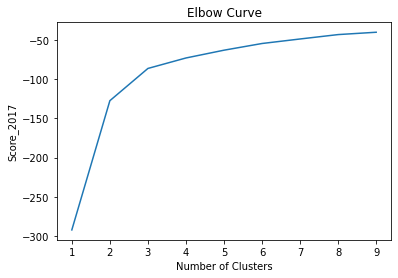

In [17]:
# And finally, create the elbow graph
pl.plot(num_cl,score_2017)
pl.xlabel('Number of Clusters')
pl.ylabel('Score_2017')
pl.title('Elbow Curve')
pl.show()

The elbow, or the breaking point of the curve, is where the curve begins to flatten out. In this case, we can see that it jumps rapidly from one to two then to three on the x-axis, then rises only slowly after three. That the optimal count for this clusters is just about three. Let's take three clusters in this case.  

# 04a. K-Means Clustering - 2017 Data

In [18]:
# Create the object based on the n° of clusters

kmeans = KMeans(n_clusters = 3) 

In [19]:
# Then fit the K-mean into the DF

kmeans.fit(df_2017_clean)

KMeans(n_clusters=3)

In [20]:
df_2017_clean['clusters'] = kmeans.fit_predict(df_2017_clean)

In [21]:
df_2017_clean.head()

,happiness_score_2017,economy_gdp_2017,family_2017,health_life_expectancy_2017,freedom_2017,generosity_2017,trust_2017,dystopia_residual_2017,clusters
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,0
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,0


In [22]:
df_2017_clean['clusters'].value_counts()

2    67
1    50
0    38
Name: clusters, dtype: int64

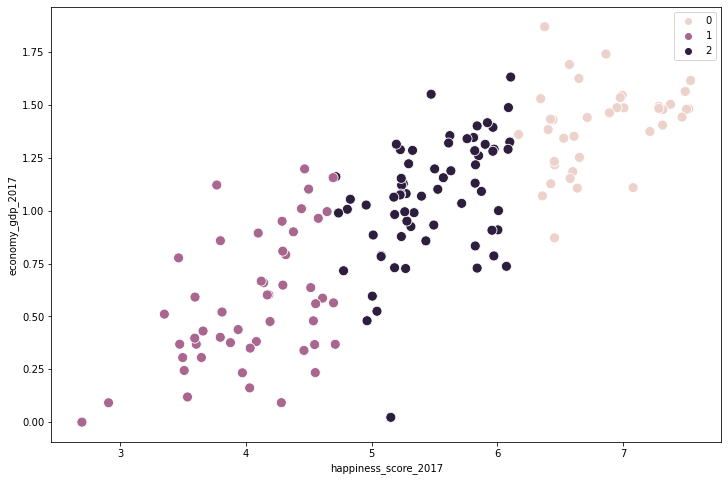

In [24]:
# Plot the clusters for the "happiness_score" and "economy_gdp" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2017_clean['happiness_score_2017'], y=df_2017_clean['economy_gdp_2017'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2017') # Label x-axis.
plt.ylabel('economy_gdp_2017') # Label y-axis.
plt.show()

The first cluster (0) has the highest economy_gdp and highest happiness score; the second cluster (1) has the lowest economy gdp and lowest happiness score. The third cluster (2) major sat in the middle economy gdp and the happiness score is in middle too. 

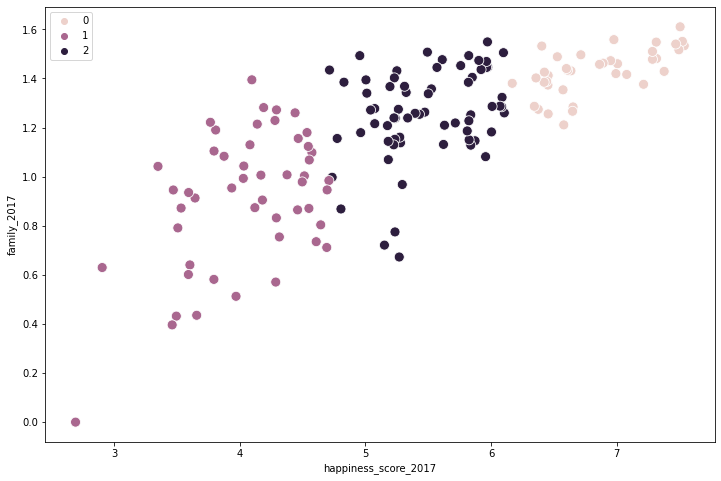

In [25]:
# Plot the clusters for the "happiness_score" and "family" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2017_clean['happiness_score_2017'], y=df_2017_clean['family_2017'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2017') # Label x-axis.
plt.ylabel('family_2017') # Label y-axis.
plt.show()

The first cluster (0) has the highest family score and the highest happiness score; the second cluster (1) has the lowest family score and lowest happiness score. The third cluster (2) major sat in the middle family score and the happiness score is in middle too. 

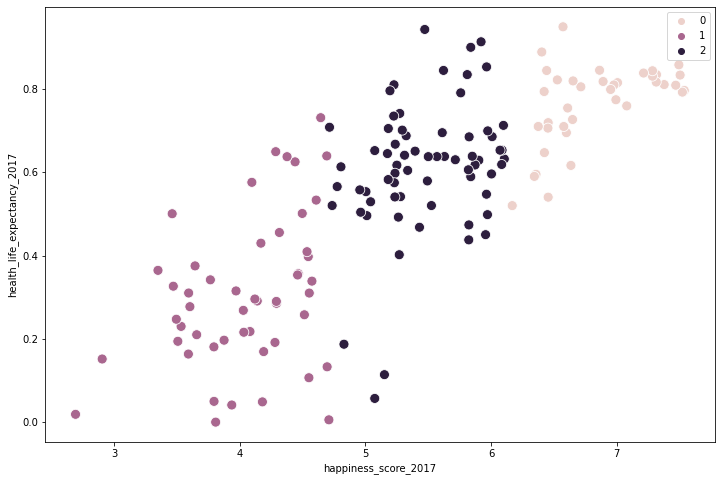

In [26]:
# Plot the clusters for the "happiness_score" and "health_life_expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2017_clean['happiness_score_2017'], y=df_2017_clean['health_life_expectancy_2017'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2017') # Label x-axis.
plt.ylabel('health_life_expectancy_2017') # Label y-axis.
plt.show()

The first cluster (0) has the highest health life expectancy score and highest happiness score; the second cluster (1) has the lowest health life expectancy score and lowest happiness score. The third cluster (2) major sat in the middle health life expectancy score and the happiness score is in middle too.

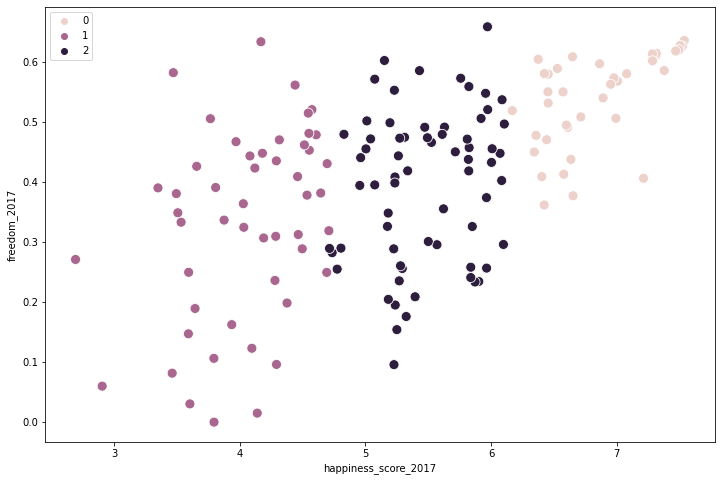

In [27]:
# Plot the clusters for the "happiness_score" and "freedom" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2017_clean['happiness_score_2017'], y=df_2017_clean['freedom_2017'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2017') # Label x-axis.
plt.ylabel('freedom_2017') # Label y-axis.
plt.show()

The first cluster (0) has the highest freedom score and highest happiness score; the second cluster (1) has the lowest freedom score and lowest happiness score. The third cluster (2) major sat in the middle freedom score and the happiness score is in middle too.

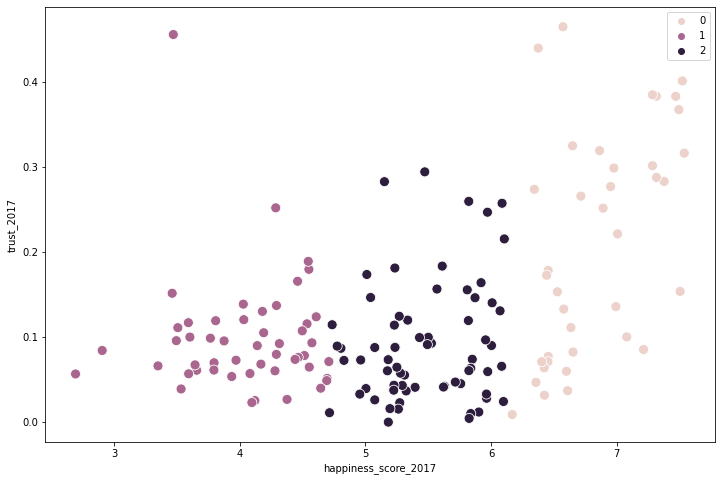

In [28]:
# Plot the clusters for the "happiness_score" and "trust" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2017_clean['happiness_score_2017'], y=df_2017_clean['trust_2017'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2017') # Label x-axis.
plt.ylabel('trust_2017') # Label y-axis.
plt.show()

The first cluster (0) has the highest trust score and highest happiness score; the second cluster (1) has the lowest trust score and lowest happiness score. The third cluster (2) major sat in the middle trust score and the happiness score is in middle too.

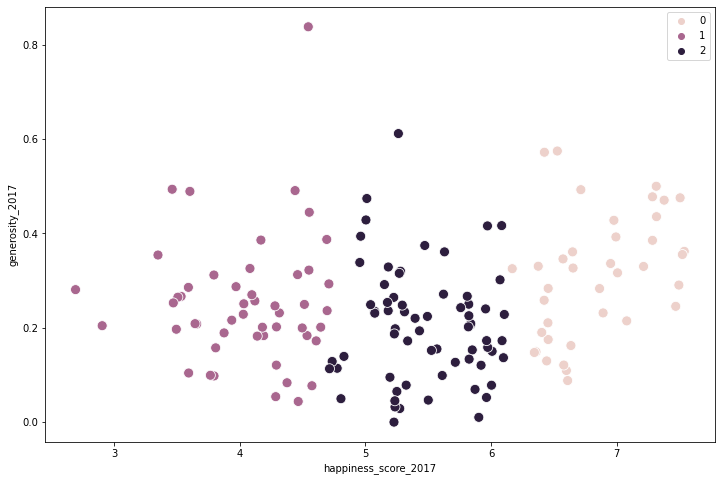

In [29]:
# Plot the clusters for the "happiness_score" and "generosity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2017_clean['happiness_score_2017'], y=df_2017_clean['generosity_2017'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2017') # Label x-axis.
plt.ylabel('generosity_2017') # Label y-axis.
plt.show()

The first cluster (0) has the highest generosity score and highest happiness score; the second cluster (1) has the lowest generosity score and lowest happiness score. The third cluster (2) major sat in the middle generosity score and the happiness score is in middle too.

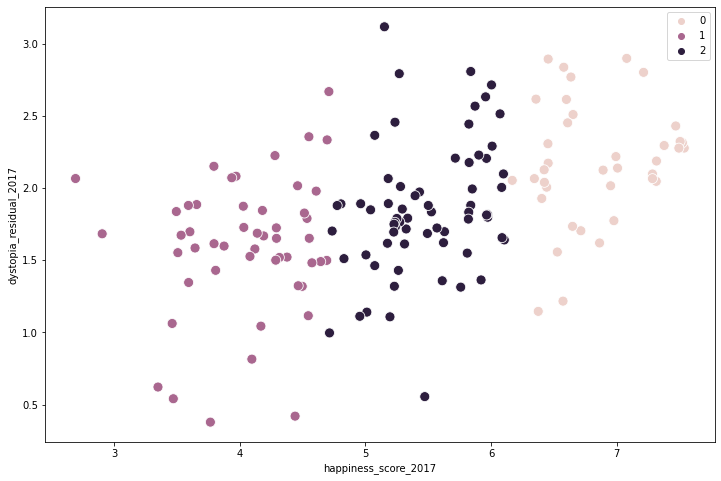

In [30]:
# Plot the clusters for the "happiness_score" and "dystopia_residual" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2017_clean['happiness_score_2017'], y=df_2017_clean['dystopia_residual_2017'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2017') # Label x-axis.
plt.ylabel('dystopia_residual_2017') # Label y-axis.
plt.show()

The first cluster (0) has the highest dystopia_residual score and highest happiness score; the second cluster (1) has the lowest dystopia_residual score and lowest happiness score. The third cluster (2) major sat in the middle dystopia_residual score and the happiness score is in middle too.

# # 05a. Grouping - 2016 Data

In [31]:
df_2017_clean.loc[df_2017_clean['clusters'] == 2, 'cluster'] = 'purple'
df_2017_clean.loc[df_2017_clean['clusters'] == 1, 'cluster'] = 'whitish purple'
df_2017_clean.loc[df_2017_clean['clusters'] == 0, 'cluster'] = 'whitish pink'

In [32]:
df_2017_clean.groupby('clusters').agg({'happiness_score_2017':['mean', 'median'],
                                       'economy_gdp_2017':['mean', 'median'],
                                       'family_2017':['mean', 'median'], 
                         'health_life_expectancy_2017':['mean', 'median'], 
                         'freedom_2017':['mean', 'median'],
                    'trust_2017':['mean', 'median'],
                    'generosity_2017':['mean', 'median'],
                    'dystopia_residual_2017':['mean', 'median']})

happiness_score_2017         economy_gdp_2017           family_2017  \
                         mean  median             mean    median        mean   
clusters                                                                       
0                    6.839553  6.6830         1.405048  1.442603    1.430066   
1                    4.056040  4.1295         0.560318  0.516079    0.911410   
2                    5.480119  5.4300         1.063039  1.079374    1.259196   

                   health_life_expectancy_2017           freedom_2017  \
            median                        mean    median         mean   
clusters                                                                
0         1.432596                    0.766868  0.802143     0.539011   
1         0.949937                    0.304286  0.290439     0.330351   
2         1.262791                    0.613471  0.628950     0.393461   

                   trust_2017           generosity_2017            \
            median       mean    median            mean    median   
clusters                                                            
0         0.565139   0.210769  0.199561        0.312749  0.325979   
1         0.356123   0.098244  0.081883        0.252895  0.233918   
2         0.418421   0.091973  0.073345        0.205040  0.201964   

         dystopia_residual_2017            
                           mean    median  
clusters                                   
0                      2.174986  2.155458  
1                      1.598475  1.651770  
2                      1.853935  1.813312

The cluster 0 has the best stats in almost all categories. The median number of happiness score for this cluster is 6.68, which is significantly larger than the other two. But the dystopia residual for this cluster is high (2.16) compared to the other two cluster. It is contradict to the exercise 6.2 - The highest happiness score country normally has the lowest dystopia residual. 